In [1]:
from pyforest import*
import warnings
import os

In [2]:
df=pd.read_csv("c:/Users/MSI/Desktop/SampleSuperstore.csv")

In [3]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [6]:
df.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [7]:
df.shape

(9994, 13)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [9]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [10]:
plt.figure(figsize=(15,5))
sns.barplot(x=df.isnull().sum().index,y=df.isnull().sum())

C:\Users\MSI\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [11]:
df.describe(include="O")

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category
count,9994,9994,9994,9994,9994,9994,9994,9994
unique,4,3,1,531,49,4,3,17
top,Standard Class,Consumer,United States,New York City,California,West,Office Supplies,Binders
freq,5968,5191,9994,915,2001,3203,6026,1523


In [12]:
df.mean()

Postal Code    55190.379428
Sales            229.858001
Quantity           3.789574
Discount           0.156203
Profit            28.656896
dtype: float64

In [13]:
df.mode()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Standard Class,Consumer,United States,New York City,California,10035,West,Office Supplies,Binders,12.96,3,0.0,0.0


In [14]:
print(df.median())

Postal Code    56430.5000
Sales             54.4900
Quantity           3.0000
Discount           0.2000
Profit             8.6665
dtype: float64


In [15]:
df.quantile()

Postal Code    56430.5000
Sales             54.4900
Quantity           3.0000
Discount           0.2000
Profit             8.6665
Name: 0.5, dtype: float64

In [16]:
df["Discount"]

0       0.00
1       0.00
2       0.00
3       0.45
4       0.20
        ... 
9989    0.20
9990    0.00
9991    0.20
9992    0.00
9993    0.00
Name: Discount, Length: 9994, dtype: float64

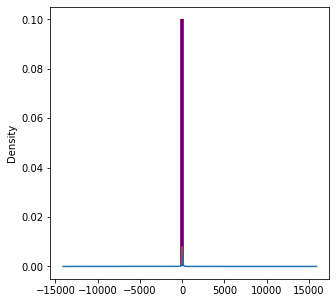

In [17]:
# Create density plot kind="density"
df['Profit'].plot(kind="density",figsize=(5,5))

# create a green line plot for mean  on the density plot:
plt.vlines(df['Profit'].mean(),ymin=0,ymax=0.10,linewidth=4.0,color="red")

# create a red line plot for median  on the density plot:
plt.vlines(df['Profit'].median(),ymin=0, ymax=0.10,linewidth=2.0,color="blue")

In [18]:
print(df['Profit'].max() - df['Profit'].min())

14999.954000000002


In [19]:
df.var()

Postal Code    1.028080e+09
Sales          3.884345e+05
Quantity       4.951113e+00
Discount       4.262242e-02
Profit         5.487780e+04
dtype: float64

In [20]:
df.std()

Postal Code    32063.693350
Sales            623.245101
Quantity           2.225110
Discount           0.206452
Profit           234.260108
dtype: float64

In [21]:
df.mad()

Postal Code    29111.248431
Sales            268.156313
Quantity           1.742739
Discount           0.151104
Profit            63.496185
dtype: float64

In [22]:
df.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


In [23]:
df.cov()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.028080e+09,-476682.766590,910.415885,386.870404,-225045.849445
Sales,-4.766828e+05,388434.455308,278.459923,-3.627228,69944.096586
Quantity,9.104159e+02,278.459923,4.951113,0.003961,34.534769
Discount,3.868704e+02,-3.627228,0.003961,0.042622,-10.615173
Profit,-2.250458e+05,69944.096586,34.534769,-10.615173,54877.798055


Text(0.7, 19.5, 'IQR')

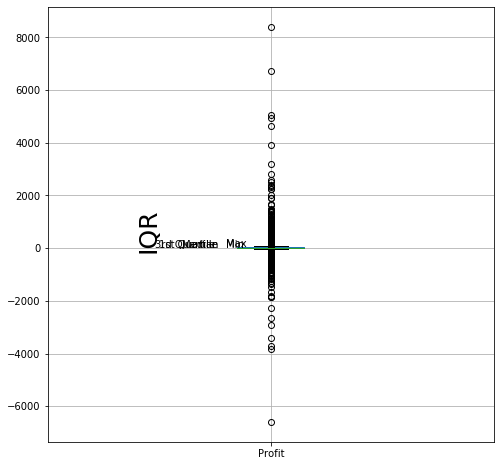

In [24]:

df.boxplot(column="Profit",return_type='axes',figsize=(8,8))

# create text(x=0.74, y=22.25, s="3rd Quartile")like Median, 1st Quartile,Min,Max,IQR:
plt.text(x=0.74, y=22.25, s="3rd Quartile")
plt.text(x=0.8, y=18.75, s="Median")
plt.text(x=0.75, y=15.5, s="1st Quartile")
plt.text(x=0.9, y=10, s="Min")
plt.text(x=0.9, y=33.5, s="Max")
plt.text(x=0.7, y=19.5, s="IQR", rotation=90, size=25)

In [25]:
df.skew()

Postal Code    -0.128526
Sales          12.972752
Quantity        1.278545
Discount        1.684295
Profit          7.561432
dtype: float64

In [26]:
df.kurt()

Postal Code     -1.493020
Sales          305.311753
Quantity         1.991889
Discount         2.409546
Profit         397.188515
dtype: float64

In [27]:
df["Ship Mode"].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

In [28]:
df["Country"].value_counts()

United States    9994
Name: Country, dtype: int64

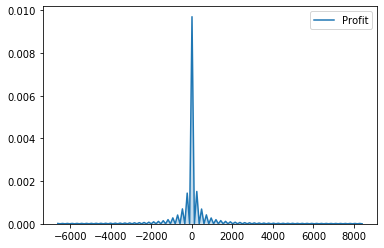

In [29]:
sns.kdeplot(df['Profit'], shade=True)

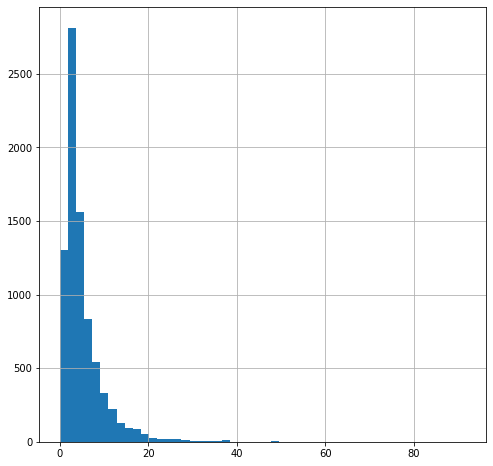

In [30]:
import numpy as np
# Get the square root of data points*
sqrt_transformed = df["Profit"].apply(np.sqrt)

 # Plot histogram for sqrt_transformed
sqrt_transformed.hist(figsize=(8,8),bins=50)  

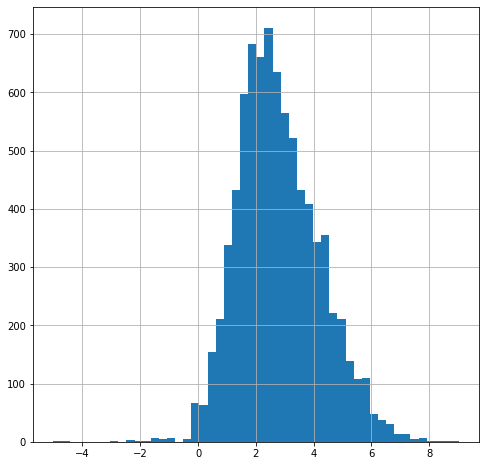

In [31]:
log_transformed = (df["Profit"]+1).apply(np.log)   # Get the log of the data

log_transformed.hist(figsize = (8,8),          # Plot histogram
                 bins=50)     

In [32]:
df["Region"].value_counts()

West       3203
East       2848
Central    2323
South      1620
Name: Region, dtype: int64

In [33]:
df["Category"].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [34]:
df["Sub-Category"].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

In [35]:
df["Quantity"].value_counts()

3     2409
2     2402
5     1230
4     1191
1      899
7      606
6      572
9      258
8      257
10      57
11      34
14      29
13      27
12      23
Name: Quantity, dtype: int64

C:\Users\MSI\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\MSI\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\MSI\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


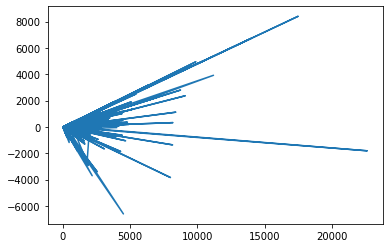

In [36]:
from matplotlib import pyplot as plt  
x=df["Sales"]
y=df["Profit"]
# Function to plot  
plt.plot(x, y)  
  
# function to show the plot  
plt.show() 

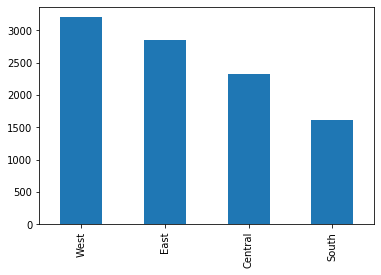

In [45]:
df["Region"].value_counts().plot(kind="bar")

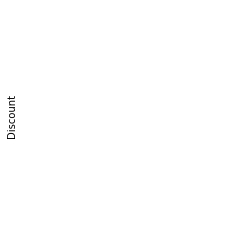

In [46]:
Data = df[df.Discount == 40]
Data.head()
Data.Discount.value_counts().plot(kind='pie')

<BarContainer object of 9994 artists>

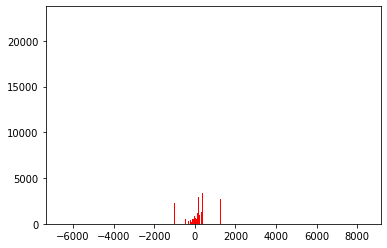

In [47]:
plt.bar(df["Profit"], df["Sales"], label='First Bars', color='red')
plt.bar(df["Quantity"], df["Discount"], label='Second Bars', color='black')

In [48]:
df.State.value_counts(ascending=False)

California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
Louisiana                 42
South Carolina            42
Nevada        

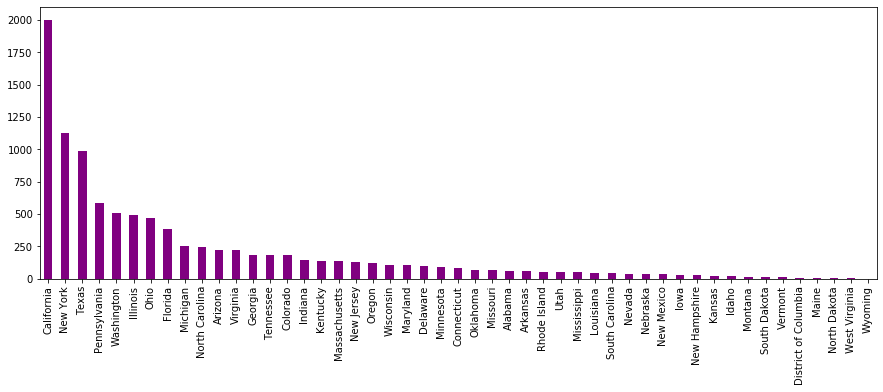

In [49]:

plt.figure(figsize=(15,5))
df['State'].value_counts().plot(kind='bar',color='purple')

([<matplotlib.patches.Wedge at 0x1ba718744e0>,
 [Text(0.9763276824947603, 0.5067388443709546, 'Binders'),
  Text(0.19978472989163298, 1.081705163943543, 'Paper'),
  Text(-0.5738784222686997, 0.9384367620966201, 'Furnishings'),
  Text(-0.9944482652289589, 0.470183631981287, 'Phones'),
  Text(-1.0940868088550497, -0.11390370797025917, 'Storage'),
  Text(-0.8953340580942692, -0.6390437578260567, 'Art'),
  Text(-0.4854447900078828, -0.9870883222154959, 'Accessories'),
  Text(-0.021437193482498344, -1.0997910923150787, 'Chairs'),
  Text(0.34701412694296424, -1.0438300607388218, 'Appliances'),
  Text(0.6045347489929012, -0.9189873433622958, 'Labels'),
  Text(0.786448767511178, -0.7690892900568498, 'Tables'),
  Text(0.9115071047427434, -0.6157554693248787, 'Envelopes'),
  Text(0.9940044193351475, -0.4711212310458919, 'Bookcases'),
  Text(1.0499830321338506, -0.3279262603558997, 'Fasteners'),
  Text(1.0832417906883753, -0.1912778683126777, 'Supplies'),
  Text(1.0965777941706178, -0.08670144942

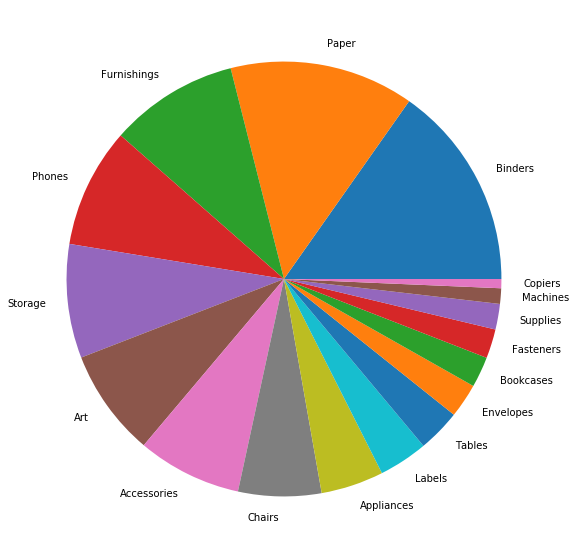

In [39]:
tempdf=df["Sub-Category"].value_counts().sort_values(ascending=False) 

plt.figure(figsize=(40,10))
plt.pie(tempdf,labels=tempdf.index)

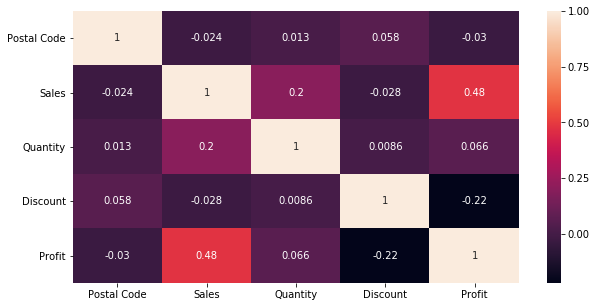

In [52]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True) 

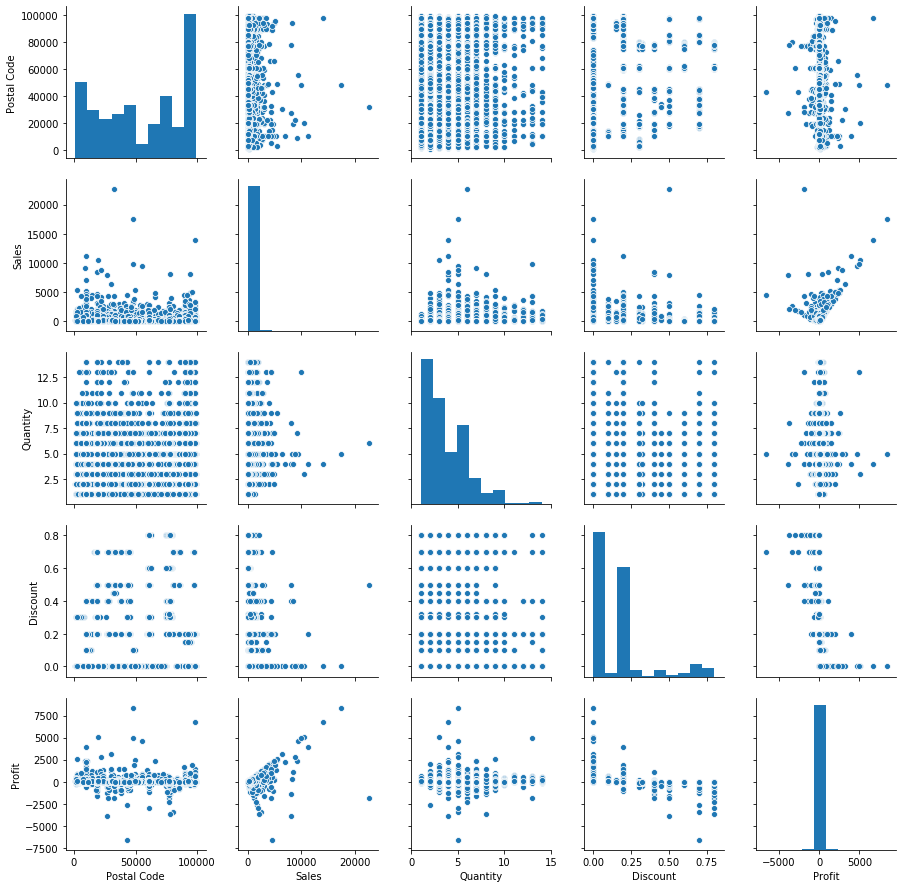

In [53]:
pair_num = df.select_dtypes(exclude= 'object')
sns.pairplot(pair_num)